Proccessing Data

In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('pnas.1424033112.sd01.txt', delimiter='\t', skiprows=[n for n in range(19)], header=None)
lang_df = df.iloc[:,:9]
columns = ['Ruhlen Record Number', 'Ruhlen Name', 'ISO', 'ISOA3', 'Ethnologue Classifcation', 'Population', 'Location', 'Latitude', 'Longitude']
lang_df.columns = columns
lang_df = lang_df.drop_duplicates(subset = ['Ruhlen Name'], keep = 'first')
afro_df = lang_df.loc[lang_df['Location'] == 'Africa']
afro_df = afro_df[afro_df['Ruhlen Name'].isin(['Yoruba', 'Igbo'])]
#define constants: population 

In [431]:
population = afro_df[['Population', 'Ruhlen Name']]
pop_size = population['Population'].sum()
prop_p_0 = population['Population'].to_numpy()
prop_p_0 = prop_p_0/(pop_size)
n_gen = 100
n_reps = 50
prop_p_0

array([0.51219512, 0.48780488])

In [432]:
history = [prop_p_0]
for i in range(n_reps):
    prop_p = prop_p_0
    for j in range(n_gen):
        next_gen = np.random.binomial(pop_size, prop_p)
        prop_p = next_gen/pop_size
        history.append(prop_p)

history = np.array(history)
simulation = [0]
for i in range(n_reps):
    simulation.extend([i+1 for j in range(n_gen)])

trajectory_df = pd.DataFrame(history, columns = ['Yoruba', 'Igbo'])
trajectory_df['simulation'] = simulation
trajectory_df

,Yoruba,Igbo,simulation
0,0.512195,0.487805,0
1,0.512029,0.487809,1
2,0.512023,0.487774,1
3,0.511892,0.487751,1
4,0.511984,0.487792,1
...,...,...,...
49996,0.511184,0.490754,50
49997,0.511153,0.490869,50
49998,0.511217,0.490862,50
49999,0.511247,0.490736,50


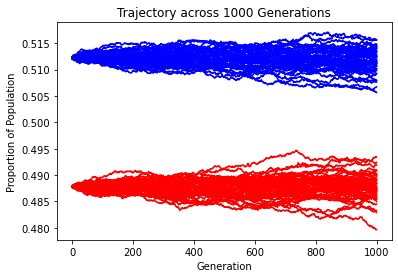

0        0.017247
1        0.017126
2        0.017146
3        0.017070
4        0.017107
           ...   
49996    0.014446
49997    0.014343
49998    0.014393
49999    0.014504
50000    0.014495
Length: 50001, dtype: float64


In [433]:
def plot_lang(df, color):
    for i in range(n_reps):
        graph = df[df['simulation']==i+1]
        graph = graph.reset_index()
        graph = graph.drop(labels='index', axis=1)
        plt.plot(graph.iloc[:,0], color = color)
plot_lang(trajectory_df[['Yoruba', 'simulation']], 'blue')
plot_lang(trajectory_df[['Igbo', 'simulation']], 'red')
plt.title('Trajectory across 100 Generations')
plt.xlabel('Generation')
plt.ylabel('Proportion of Population')
#plt.ylim((0,.6))
plt.show()
print(trajectory_df[['Yoruba', 'Igbo']].std(axis=1))

Same proccess but for South Africa Region

In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('pnas.1424033112.sd01.txt', delimiter='\t', skiprows=[n for n in range(19)], header=None)
lang_df = df.iloc[:,:9]
columns = ['Ruhlen Record Number', 'Ruhlen Name', 'ISO', 'ISOA3', 'Ethnologue Classifcation', 'Population', 'Location', 'Latitude', 'Longitude']
lang_df.columns = columns
lang_df = lang_df.drop_duplicates(subset = ['Ruhlen Name'], keep = 'first')
afro_df = lang_df.loc[lang_df['Location'] == 'Africa']
afro_df = afro_df[afro_df['Ruhlen Name'].isin(['Hadza', 'Qxu^'])]
#define constants: population 

In [435]:
population = afro_df[['Population', 'Ruhlen Name']]
pop_size = population['Population'].sum()
prop_p_0 = population['Population'].to_numpy()
prop_p_0 = prop_p_0/(pop_size)
n_gen = 10
n_reps = 50
prop_p_0

array([0.3125, 0.6875])

In [436]:
history = [prop_p_0]
for i in range(n_reps):
    prop_p = prop_p_0
    for j in range(n_gen):
        next_gen = np.random.binomial(pop_size, prop_p)
        prop_p = next_gen/pop_size
        history.append(prop_p)

history = np.array(history)
simulation = [0]
for i in range(n_reps):
    simulation.extend([i+1 for j in range(n_gen)])

trajectory_df = pd.DataFrame(history, columns = ['Hadza', 'Qxu^'])
trajectory_df['simulation'] = simulation
trajectory_df

,Hadza,Qxu^,simulation
0,0.312500,0.687500,0
1,0.311328,0.679688,1
2,0.316406,0.674219,1
3,0.308984,0.675781,1
4,0.316797,0.664453,1
...,...,...,...
496,0.290625,0.694531,50
497,0.298438,0.674609,50
498,0.290625,0.664453,50
499,0.294922,0.656641,50


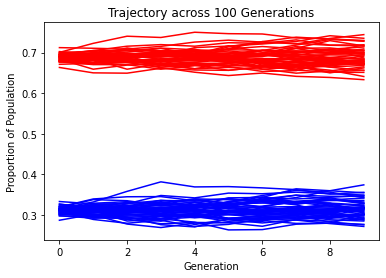

Hadza    0.019036
Qxu^     0.018880
dtype: float64


In [437]:
plot_lang(trajectory_df[['Hadza', 'simulation']], 'blue')
plot_lang(trajectory_df[['Qxu^', 'simulation']], 'red')
plt.title('Trajectory across 100 Generations')
plt.xlabel('Generation')
plt.ylabel('Proportion of Population')
#plt.ylim((0,.6))
plt.show()
print(trajectory_df[['Hadza', 'Qxu^']].std(axis=0))